In [1]:
import pandas as pd
import numpy as np
import sys
import csv
import itertools
import matplotlib.pyplot as plt


import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix



In [2]:
# file containing clean data about employees
file = "./clean_data/employee_categorised.csv"

# import the .csv file into a pandas dataframe
data = pd.read_csv(file)
data.head()

,isPromotion,num_exp,sum_exp,avg_exp,Promotions,age,time_education,count_education,category
0,1,4.0,44.0,11.000000,1.0,25.666667,110.0,3.0,2.0
1,0,3.0,20.0,6.666667,0.0,23.666667,110.0,3.0,2.0
2,0,2.0,7.0,3.500000,0.0,22.583333,110.0,3.0,1.0
3,0,1.0,3.0,3.000000,0.0,22.250000,110.0,3.0,1.0
4,0,8.0,210.0,26.250000,2.0,39.500000,170.0,6.0,1.0


#### Round off to two decimal places

In [3]:
data['avg_exp'] = round(data['avg_exp'], 2)
data['age'] = round(data['age'], 2)
data = data.astype(int)
# data.head()

#### Check distribution of categories 

Text(0.5, 1.0, 'Distribution of categories')

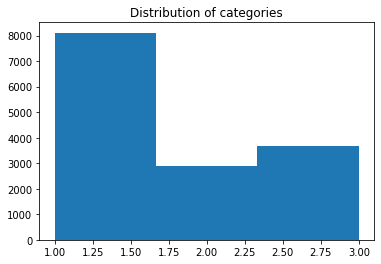

In [4]:
fig, axs = plt.subplots(1)
axs.hist(data['category'], bins=3)
axs.set_title("Distribution of categories")

#### check distribution of number of experience

Text(0.5, 1.0, 'Distribution - average experiences')

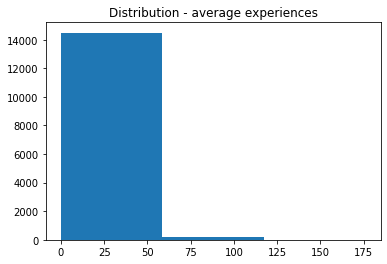

In [5]:
# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(data['num_exp'],data['inRole_time']) #retain
fig, axs = plt.subplots(1)
axs.hist(data['avg_exp'], bins=3)
axs.set_title("Distribution - average experiences")


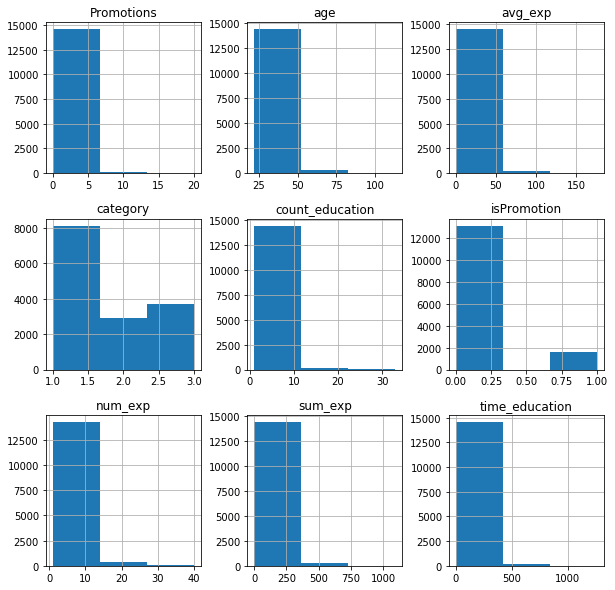

In [6]:
hist = data.hist(bins=3,figsize=(10,10))

#### drop infinity and null values

In [7]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14696 entries, 0 to 14695
Data columns (total 9 columns):
isPromotion        14696 non-null int64
num_exp            14696 non-null int64
sum_exp            14696 non-null int64
avg_exp            14696 non-null int64
Promotions         14696 non-null int64
age                14696 non-null int64
time_education     14696 non-null int64
count_education    14696 non-null int64
category           14696 non-null int64
dtypes: int64(9)
memory usage: 1.1 MB


#### Correlation

,isPromotion,num_exp,sum_exp,avg_exp,Promotions,age,time_education,count_education,category
isPromotion,1.000000,0.087052,0.111773,0.083666,0.386727,0.111309,0.005055,-0.016683,0.332429
num_exp,0.087052,1.000000,0.701349,0.070075,0.492973,0.699187,0.161474,0.311666,0.062036
sum_exp,0.111773,0.701349,1.000000,0.622007,0.499255,0.999336,0.049911,0.105826,0.334723
avg_exp,0.083666,0.070075,0.622007,1.000000,0.163021,0.622507,-0.067423,-0.127712,0.575015
Promotions,0.386727,0.492973,0.499255,0.163021,1.000000,0.498669,0.075817,0.123039,0.190883
age,0.111309,0.699187,0.999336,0.622507,0.498669,1.000000,0.049554,0.105745,0.334673
time_education,0.005055,0.161474,0.049911,-0.067423,0.075817,0.049554,1.000000,0.555142,-0.036592
count_education,-0.016683,0.311666,0.105826,-0.127712,0.123039,0.105745,0.555142,1.000000,-0.090385
category,0.332429,0.062036,0.334723,0.575015,0.190883,0.334673,-0.036592,-0.090385,1.000000


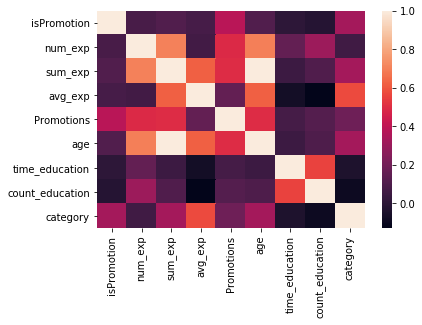

In [8]:
import seaborn as sns
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr


#### standardise data as features are not the same range

In [9]:
# Get column names to standardize
names = data[['num_exp','sum_exp','avg_exp','Promotions','age','isPromotion','count_education']]
# Create the Scaler object
data_std = StandardScaler().fit_transform(names)
pd.DataFrame(data_std).head()

,0,1,2,3,4,5,6
0,-0.132810,-0.339903,-0.342518,0.216533,-0.371237,2.857938,-0.199879
1,-0.400984,-0.590271,-0.697105,-0.485933,-0.621925,-0.349903,-0.199879
2,-0.669158,-0.725887,-0.909858,-0.485933,-0.747268,-0.349903,-0.199879
3,-0.937332,-0.767615,-0.909858,-0.485933,-0.747268,-0.349903,-0.199879
4,0.939887,1.391809,0.721243,0.918999,1.383573,-0.349903,1.013933


#### Test train split

In [10]:
X=data_std
# X=dataset
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### SVM

In [11]:
#training wih support vector classifier
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc_test = accuracy_score(y_test,y_pred)
acc_svc_train = accuracy_score(y_train,ypred_train)
print(acc_svc_test)
print(acc_svc_train)

NameError: name 'ypred_train' is not defined

In [ ]:
print("Precision Score:", precision_score(y_test, y_pred, average='macro'))

In [ ]:
print(confusion_matrix(y_test, y_pred))

#### Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=200)
# Fit on training data
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
#predict test data
ypred_test = model.predict(X_test)
#calculate accuracy score - fraction of correct predictions
score_test = accuracy_score(y_test,ypred_test)
score_train = accuracy_score(y_train,ypred_train)
print(score_train)
print(score_test)
acc_Rforest = round(model.score(X_test, y_test) * 100, 2)
acc_Rforest

In [ ]:
print("Precision Score:", precision_score(y_test, ypred_test, average='macro'))

In [ ]:
print(confusion_matrix(y_test, ypred_test))